# FINAL PROJECT - PART 16 - NLP SENTIMENT ANALYSIS

In this part of the project I analyse the reviews for the different apps.
I will use VADER for the sentiment analysis. As VADER works in English first I'm going
to translate all the reviews

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
apps_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Apps_review_translated.csv')

In [3]:
apps_df

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng
0,El Poder de la mente,Emprendedora apps,Estilo de vida,4.4,100000,"Guauu, que buena aplicación. Amo los temas de ...","Wow, what a nice app. I love the topics of sel..."
1,Audios de Autoestima💪Motivación😄Superación❤️,DAVID B MARÍN,Educación,4.6,5000,"Muy buenos mensajes, positivos y con mucho emp...","Very good messages, positive and with a lot of..."
2,"Goalmap: motivación, bienestar, metas personales",GOALMAP,Productividad,3.3,100000,Excelente aplicación para cumplir metas de háb...,Excellent application to meet goals of habits ...
3,Crecimiento Espiritual,Apps Bíblicas Cristianas Interesantes,Libros y obras de consulta,4.6,100000,"Muy buena aplicasion,lo que más me gusta es qu...","Very good application, what I like the most is..."
4,Mindfulness Meditación guiada,Metta Apps,Estilo de vida,4.1,100000,El contenido de la app es excepcional y muy út...,The content of the app is exceptional and very...
...,...,...,...,...,...,...,...
668,Meditación Guiada Gratis,AbacaxiApps,Salud y bienestar,4.3,50000,Estan muy interesantes las meditaciones guiada...,The guided meditations are very interesting an...
669,"Control y Monitor: Ansiedad, Ánimo y Autoestima",TwoCats App,Estilo de vida,4.6,1000000,"Esta es de las mejores cosas que me pasó, es u...",This is one of the best things that happened t...
670,Pixels - Estados de Ánimo y Mindfulness,Teo Vogel,Estilo de vida,4.7,500000,"me gusta mucho la app, pero estaría bueno que ...","I really like the app, but it would be nice if..."
671,Psicología Positiva Fácil,3Temes Publishers,Salud y bienestar,4.1,50000,"letras muy pequeñas, que se hace imposible lee...","very small letters, which makes it impossible ..."


In [4]:
apps_annexed_df=pd.read_csv('/Users/nuria/Documents/datasciencecourse/FINAL PROJECT/Annexed Apps translated.csv')

In [5]:
apps_annexed_df

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng
0,#SelfCare,"Tru Luv Media, Inc.",Juegos de rol,4.4,500000,"Me encanta. A veces se cierra solo, pero pasa ...","I love it. Sometimes it closes by itself, but ..."
1,#SelfCare,"Tru Luv Media, Inc.",Juegos de rol,4.4,500000,Es muy buena pero no se por qué se me borran l...,It is very good but I do not know why the data...
2,#SelfCare,"Tru Luv Media, Inc.",Juegos de rol,4.4,500000,"Me hubiera gustado probarla más, más sin embar...","I would have liked to try it more, more howeve..."
3,#SelfCare,"Tru Luv Media, Inc.",Juegos de rol,4.4,500000,El juego está bien solo dos cosas no me gustar...,The game is fine only two things I did not lik...
4,7 Cups - ansiedad y estrés,7 Cups of Tea,Salud y bienestar,4.1,1000000,"Es muy buena app, te ayuda mucho si estas busc...","It is a very good app, it helps you a lot if y..."
...,...,...,...,...,...,...,...
248,Woebot: Your Self-Care Expert,Woebot Labs,Medicina,4.6,100000,Muy Bueno. Sabe identificar el problema y actu...,Very good. He knows how to identify the proble...
249,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta supeer genial pero si tuviera la opcion d...,This is super cool but if I had the option to ...
250,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Al comienzo parece muy buena. Luego lo único q...,At first it seems very good. Then all it does ...
251,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta app simplemente es magnífica me siento re...,"This app is simply magnificent, I feel relaxed..."


In [ ]:
# concat both datasets into one

In [6]:
translated_df=pd.concat([apps_df,apps_annexed_df])

In [8]:
translated_df.reset_index(drop=True, inplace=True)

In [9]:
translated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               926 non-null    object 
 1   Developer         926 non-null    object 
 2   Type              926 non-null    object 
 3   Rates             926 non-null    float64
 4   Downloads+        926 non-null    int64  
 5   Last_reviews      924 non-null    object 
 6   Last_reviews_eng  926 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 50.8+ KB


In [10]:
translated_df=translated_df.dropna()

In [12]:
translated_df.reset_index(drop=True, inplace=True)

In [13]:
translated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               924 non-null    object 
 1   Developer         924 non-null    object 
 2   Type              924 non-null    object 
 3   Rates             924 non-null    float64
 4   Downloads+        924 non-null    int64  
 5   Last_reviews      924 non-null    object 
 6   Last_reviews_eng  924 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 50.7+ KB


In [16]:
translated_df.duplicated().sum()

22

In [ ]:
#There are 22 reviews that are the same, so I will drop them

In [18]:
translated_df.drop_duplicates(inplace=True)

In [19]:
translated_df.reset_index(drop=True,inplace=True)

In [20]:
translated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               902 non-null    object 
 1   Developer         902 non-null    object 
 2   Type              902 non-null    object 
 3   Rates             902 non-null    float64
 4   Downloads+        902 non-null    int64  
 5   Last_reviews      902 non-null    object 
 6   Last_reviews_eng  902 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 49.5+ KB


##### PART 2: APPLY VADER SENTIMENT ANALYSIS 
- Get the positive, neutral, negative and compound score for the different reviews

In [21]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() #instantiate the sentiment analyzer

In [24]:
def sentiment_analyzer_scores(sentence):
    #for each sentence we apply the fucntion to get the polarity score, its linked
    #to probability
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [25]:
# getting only the negative score
#create functions to analyse and get the negative, the positive and the neutral
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [26]:
#get the different scores for each review
translated_df['sentiment_neg'] = translated_df['Last_reviews_eng'].apply(negative_score)
translated_df['sentiment_neu'] = translated_df['Last_reviews_eng'].apply(neutral_score)
translated_df['sentiment_pos'] = translated_df['Last_reviews_eng'].apply(positive_score)
translated_df['sentiment_compound'] = translated_df['Last_reviews_eng'].apply(compound_score)

In [27]:
translated_df

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,El Poder de la mente,Emprendedora apps,Estilo de vida,4.4,100000,"Guauu, que buena aplicación. Amo los temas de ...","Wow, what a nice app. I love the topics of sel...",0.048,0.752,0.200,0.9298
1,Audios de Autoestima💪Motivación😄Superación❤️,DAVID B MARÍN,Educación,4.6,5000,"Muy buenos mensajes, positivos y con mucho emp...","Very good messages, positive and with a lot of...",0.000,0.531,0.469,0.7939
2,"Goalmap: motivación, bienestar, metas personales",GOALMAP,Productividad,3.3,100000,Excelente aplicación para cumplir metas de háb...,Excellent application to meet goals of habits ...,0.071,0.747,0.182,0.6977
3,Crecimiento Espiritual,Apps Bíblicas Cristianas Interesantes,Libros y obras de consulta,4.6,100000,"Muy buena aplicasion,lo que más me gusta es qu...","Very good application, what I like the most is...",0.000,0.657,0.343,0.6997
4,Mindfulness Meditación guiada,Metta Apps,Estilo de vida,4.1,100000,El contenido de la app es excepcional y muy út...,The content of the app is exceptional and very...,0.098,0.840,0.063,-0.3259
...,...,...,...,...,...,...,...,...,...,...,...
897,Woebot: Your Self-Care Expert,Woebot Labs,Medicina,4.6,100000,Muy Bueno. Sabe identificar el problema y actu...,Very good. He knows how to identify the proble...,0.061,0.740,0.199,0.7346
898,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta supeer genial pero si tuviera la opcion d...,This is super cool but if I had the option to ...,0.000,0.806,0.194,0.4767
899,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Al comienzo parece muy buena. Luego lo único q...,At first it seems very good. Then all it does ...,0.040,0.880,0.081,0.3158
900,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta app simplemente es magnífica me siento re...,"This app is simply magnificent, I feel relaxed...",0.000,0.701,0.299,0.9661


##### PART 3: CHECK THE HISTOGRAMS FOR THE DIFFERENT SCORES

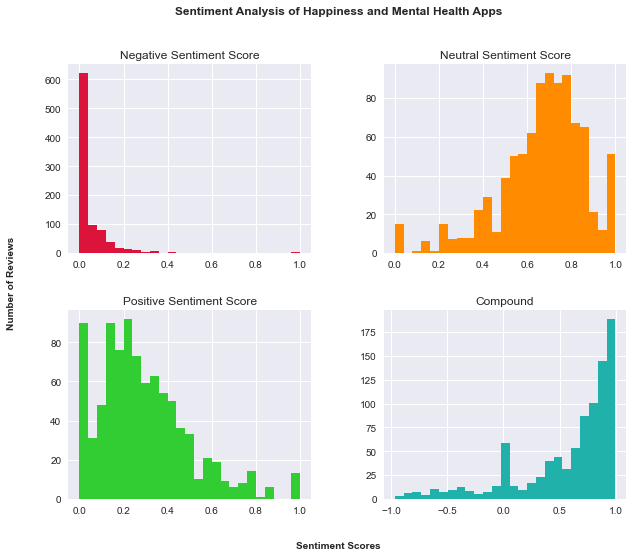

In [28]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
translated_df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='crimson')
axes[0,0].set_title('Negative Sentiment Score')
translated_df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='darkorange')
axes[0,1].set_title('Neutral Sentiment Score')
translated_df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='limegreen')
axes[1,0].set_title('Positive Sentiment Score')
translated_df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='lightseagreen')
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Happiness and Mental Health Apps\n\n', fontsize=12, fontweight='bold');

At first sight we can extract that the major number of reviews are considered as neutral and positive. If we check the compound variable we can see that the major part of the values are positve and neutral. And there are very few negative reviews. The majority of the reviews have a value of 0 at the negative score, meaning that they are at all negative.

In [29]:
# add a column with positive, neutral, and negative to calculate the %

In [30]:
translated_df['Sentiment']=''

In [31]:
#In the column sentiment I select those that are neagtive, positive and neutral and tag them in the sentiment column
translated_df.loc[translated_df['sentiment_compound'] <= -0.05, 'Sentiment'] = 'Negative'
translated_df.loc[(translated_df['sentiment_compound'] > -0.05)&(translated_df['sentiment_compound'] < 0.05), 'Sentiment'] = 'Neutral'
translated_df.loc[translated_df['sentiment_compound'] >=0.05, 'Sentiment'] = 'Positive'

In [35]:
# Percentage for each review
translated_df.Sentiment.value_counts(normalize=1)*100

Positive    83.481153
Negative     9.312639
Neutral      7.206208
Name: Sentiment, dtype: float64

In [36]:
#get a list of the values and the list of the sentiments to plot the pie chart
values=translated_df.Sentiment.value_counts()
values=values.tolist()
sentiments=translated_df.Sentiment.unique()
sentiments=sentiments.tolist()
sentiments

['Positive', 'Negative', 'Neutral']

In [37]:
import plotly.graph_objects as go

colors = ['limegreen', 'crimson', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=sentiments,values=values, textinfo='label+percent',
                             insidetextorientation='radial',hole=.5,
                             texttemplate = "%{label}: %{value:,s} <br>(%{percent})",
                             textposition = "inside"                           
                            )])
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.3)))
fig.update_layout(
    title="% Positive, Neutral and Negative reviews",
    title_x=0.5
)
fig.show()

##### PART 4 :COMPARE POSITIVE AND NEGATIVE REVIEWS

In [38]:
translated_df.head(1)

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment
0,El Poder de la mente,Emprendedora apps,Estilo de vida,4.4,100000,"Guauu, que buena aplicación. Amo los temas de ...","Wow, what a nice app. I love the topics of sel...",0.048,0.752,0.2,0.9298,Positive


In [39]:
df_pos = translated_df.loc[translated_df.Sentiment=='Positive']
df_neg = translated_df.loc[translated_df.Sentiment=='Negative']

In [40]:
df_pos

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment
0,El Poder de la mente,Emprendedora apps,Estilo de vida,4.4,100000,"Guauu, que buena aplicación. Amo los temas de ...","Wow, what a nice app. I love the topics of sel...",0.048,0.752,0.200,0.9298,Positive
1,Audios de Autoestima💪Motivación😄Superación❤️,DAVID B MARÍN,Educación,4.6,5000,"Muy buenos mensajes, positivos y con mucho emp...","Very good messages, positive and with a lot of...",0.000,0.531,0.469,0.7939,Positive
2,"Goalmap: motivación, bienestar, metas personales",GOALMAP,Productividad,3.3,100000,Excelente aplicación para cumplir metas de háb...,Excellent application to meet goals of habits ...,0.071,0.747,0.182,0.6977,Positive
3,Crecimiento Espiritual,Apps Bíblicas Cristianas Interesantes,Libros y obras de consulta,4.6,100000,"Muy buena aplicasion,lo que más me gusta es qu...","Very good application, what I like the most is...",0.000,0.657,0.343,0.6997,Positive
7,Cíngulo: Terapia Guiada,Cíngulo,Salud y bienestar,4.9,1000000,Que lindooo. Lastima que no tenga traduccion! ...,So nice. Too bad it doesn't have a translation...,0.110,0.699,0.192,0.4240,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
897,Woebot: Your Self-Care Expert,Woebot Labs,Medicina,4.6,100000,Muy Bueno. Sabe identificar el problema y actu...,Very good. He knows how to identify the proble...,0.061,0.740,0.199,0.7346,Positive
898,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta supeer genial pero si tuviera la opcion d...,This is super cool but if I had the option to ...,0.000,0.806,0.194,0.4767,Positive
899,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Al comienzo parece muy buena. Luego lo único q...,At first it seems very good. Then all it does ...,0.040,0.880,0.081,0.3158,Positive
900,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta app simplemente es magnífica me siento re...,"This app is simply magnificent, I feel relaxed...",0.000,0.701,0.299,0.9661,Positive


In [41]:
df_neg

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment
4,Mindfulness Meditación guiada,Metta Apps,Estilo de vida,4.1,100000,El contenido de la app es excepcional y muy út...,The content of the app is exceptional and very...,0.098,0.840,0.063,-0.3259,Negative
6,Desarrollo Personal,PachaStudio,Estilo de vida,2.8,1000,no carga para nada k fea app,it does not load at all k ugly app,0.292,0.708,0.000,-0.5106,Negative
13,Superación Personal - Librería,Libro Movil,Libros y obras de consulta,3.7,100000,pésima!!!! el audio se traba constantemente. d...,lousy !!!! the audio is constantly stuck. retu...,0.455,0.545,0.000,-0.7696,Negative
26,Como Ser Feliz,Wilson Castrillon,Estilo de vida,4.6,100000,Sin comentarios: tremenda aplicación,No comment: tremendous application,0.423,0.577,0.000,-0.2960,Negative
27,Libros de Motivación Personal Gratis📚Superación💪,Grupo StarkApp,Libros y obras de consulta,4.6,5000,"Contiene muchos libros interesantes, pero No f...","It contains many interesting books, but It doe...",0.087,0.879,0.034,-0.4451,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
849,Self-help Anxiety Management,University of the West England,Salud y bienestar,3.9,500000,No me sirvió de nada. Está en Inglés,It did me no good. It is in English,0.231,0.769,0.000,-0.3412,Negative
876,Talkspace Counseling & Therapy,Talkspace,Salud y bienestar,2.9,100000,U have to pay😡,U have to pay😡,0.219,0.781,0.000,-0.1027,Negative
880,Test de Depresión,MoodTools,Medicina,3.8,100000,Gracias a esta app me di cuenta que tengo depr...,Thanks to this app I realized that I have seve...,0.337,0.570,0.093,-0.6310,Negative
881,Therapeer: Peer Emotional Support,Therapeer,Salud y bienestar,4.7,10000,"Manipulative and opportunistic, the first thin...","Manipulative and opportunistic, the first thin...",0.151,0.715,0.134,-0.4767,Negative


##### Let's compare if the positive reviews are longer than the negative reviews

In [42]:
#we get the number of words per review
df_pos['text_length'] = df_pos['Last_reviews_eng'].apply(len)
df_neg['text_length'] = df_neg['Last_reviews_eng'].apply(len)

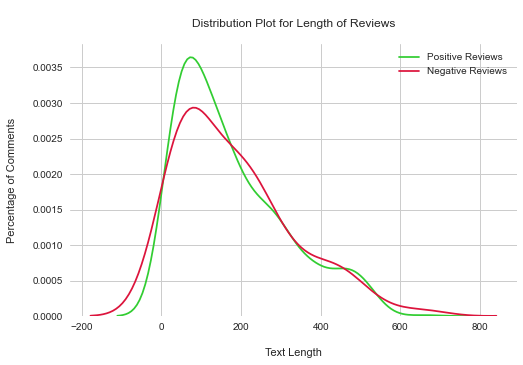

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True,hist=False, bins=100, color='limegreen',label="Positive reviews")
sns.distplot(df_neg['text_length'], kde=True,hist=False, bins=100, color='crimson',label="Negative reviews")

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Reviews', 'Negative Reviews'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [44]:
df_pos['text_length'].describe()

count    753.00000
mean     176.47676
std      135.91380
min        4.00000
25%       66.00000
50%      139.00000
75%      257.00000
max      666.00000
Name: text_length, dtype: float64

In [45]:
df_neg['text_length'].describe()

count     84.000000
mean     183.428571
std      144.685807
min        6.000000
25%       62.250000
50%      164.500000
75%      252.000000
max      657.000000
Name: text_length, dtype: float64

In [46]:
df_neg

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment,text_length
4,Mindfulness Meditación guiada,Metta Apps,Estilo de vida,4.1,100000,El contenido de la app es excepcional y muy út...,The content of the app is exceptional and very...,0.098,0.840,0.063,-0.3259,Negative,417
6,Desarrollo Personal,PachaStudio,Estilo de vida,2.8,1000,no carga para nada k fea app,it does not load at all k ugly app,0.292,0.708,0.000,-0.5106,Negative,34
13,Superación Personal - Librería,Libro Movil,Libros y obras de consulta,3.7,100000,pésima!!!! el audio se traba constantemente. d...,lousy !!!! the audio is constantly stuck. retu...,0.455,0.545,0.000,-0.7696,Negative,57
26,Como Ser Feliz,Wilson Castrillon,Estilo de vida,4.6,100000,Sin comentarios: tremenda aplicación,No comment: tremendous application,0.423,0.577,0.000,-0.2960,Negative,34
27,Libros de Motivación Personal Gratis📚Superación💪,Grupo StarkApp,Libros y obras de consulta,4.6,5000,"Contiene muchos libros interesantes, pero No f...","It contains many interesting books, but It doe...",0.087,0.879,0.034,-0.4451,Negative,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Self-help Anxiety Management,University of the West England,Salud y bienestar,3.9,500000,No me sirvió de nada. Está en Inglés,It did me no good. It is in English,0.231,0.769,0.000,-0.3412,Negative,35
876,Talkspace Counseling & Therapy,Talkspace,Salud y bienestar,2.9,100000,U have to pay😡,U have to pay😡,0.219,0.781,0.000,-0.1027,Negative,14
880,Test de Depresión,MoodTools,Medicina,3.8,100000,Gracias a esta app me di cuenta que tengo depr...,Thanks to this app I realized that I have seve...,0.337,0.570,0.093,-0.6310,Negative,86
881,Therapeer: Peer Emotional Support,Therapeer,Salud y bienestar,4.7,10000,"Manipulative and opportunistic, the first thin...","Manipulative and opportunistic, the first thin...",0.151,0.715,0.134,-0.4767,Negative,273


In [47]:
#check if the column with the review length has been done correctly
df_neg.loc[44,'Last_reviews_eng']

'The content is very good and well organized, they are the best I have seen, but the audios are cut in the middle of the meditation which is the same as not listening to anything and no questions or queries are answered, about to be uninstalled, just like that of ho oponopono. A shame!'

In [48]:
len(df_neg.loc[44,'Last_reviews_eng'])

285

##### PART 5 : WORDCLOUDS FOR POSITIVE AND NEGATIVE REVIEWS

In [49]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [50]:
def plot_wordcloud(wordcloud, sentiment_score):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(sentiment_score + ' reviews\n', fontsize=18, fontweight='bold')
    plt.show()

In [51]:
from PIL import Image
import requests
#get the imag to map the word cloud
ok_map = np.array(Image.open(requests.get('https://i.etsystatic.com/10919371/r/il/264282/1589290729/il_570xN.1589290729_cxa7.jpg', stream=True).raw))

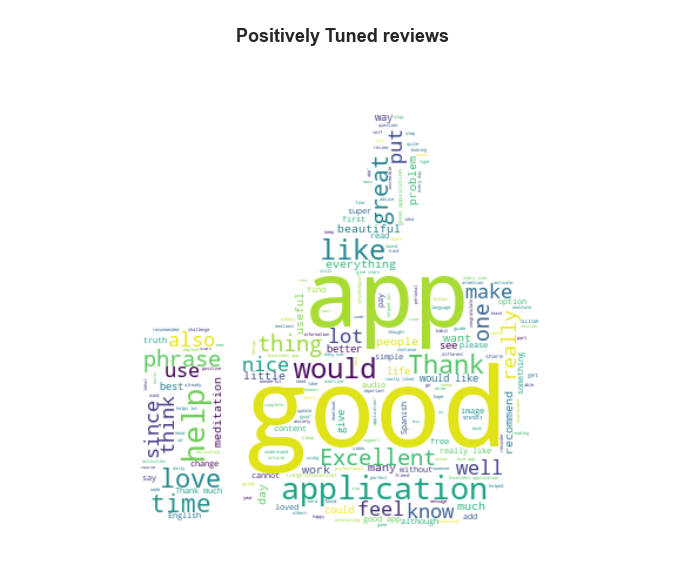

In [52]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      mask=ok_map,stopwords = stopwords.words('english')).generate(str(df_pos.Last_reviews_eng.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [53]:
ko_map = np.array(Image.open(requests.get('https://www.america-retail.com/static//2019/10/84679488-una-silueta-en-blanco-y-negro-de-un-pulgar-hacia-abajo-gesto.jpg', stream=True).raw))

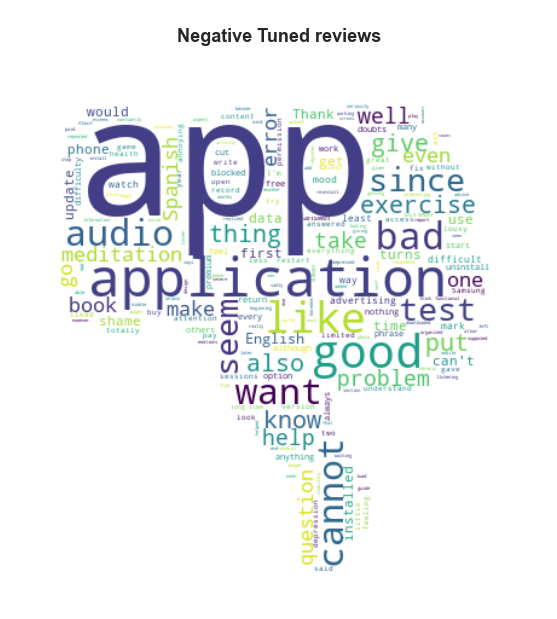

In [54]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      mask=ko_map,
                      stopwords = stopwords.words('english')).generate(str(df_neg.Last_reviews_eng.values))

plot_wordcloud(wordcloud, '\nNegative Tuned')

In [55]:
from wordcloud import STOPWORDS
# Clean the stop words
# IDOIA CODE TO CHANGE STOP WORDS
stopwords = set(STOPWORDS)

In [56]:
newStopWords= ['app','application','also','thing',]
stopwords.update(newStopWords)

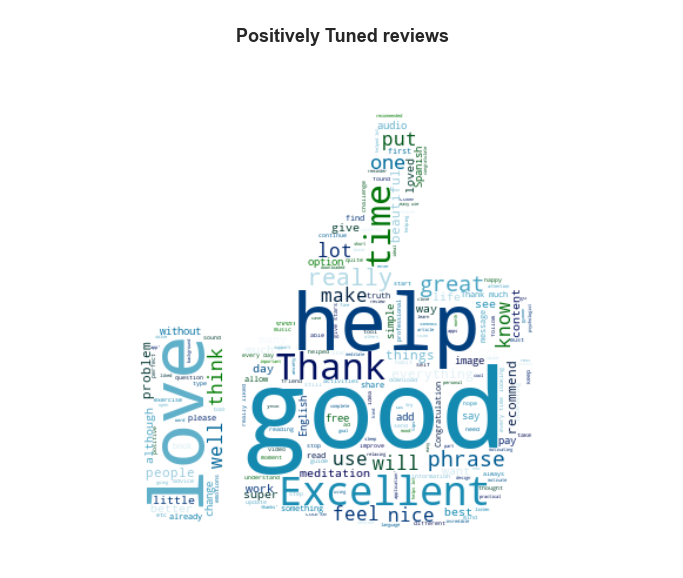

In [60]:
import matplotlib
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      colormap=matplotlib.cm.ocean,
                      mask=ok_map,stopwords = stopwords).generate(str(df_pos.Last_reviews_eng.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [61]:
#exclude not from the stopwords below for the negative reviews
stopwords_neg = set(STOPWORDS)

In [70]:
stop_words_neg = set(STOPWORDS) - set(['not','no'])

newStopWords= ['app','application','also','thing','will','no','not','good']
stop_words_neg.update(newStopWords)

In [71]:
import matplotlib
#import matplotlib.pyplot as plt

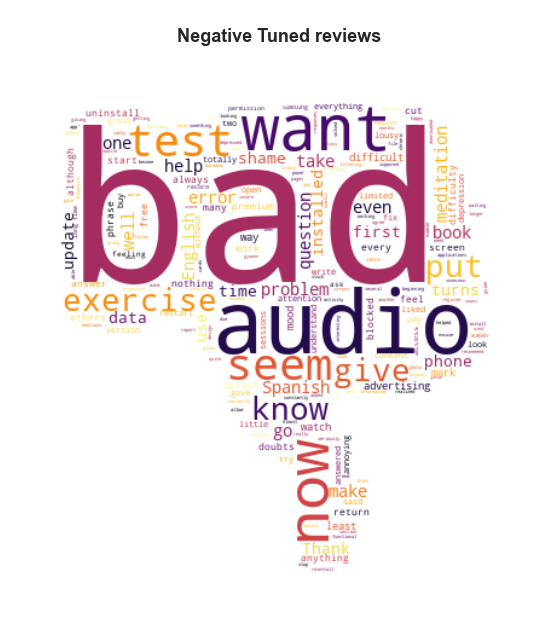

In [74]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      mask=ko_map,
                      colormap=matplotlib.cm.inferno,
                      stopwords = stop_words_neg).generate(str(df_neg.Last_reviews_eng.values))

plot_wordcloud(wordcloud, '\nNegative Tuned')

##### Part 6 - TOPICS ANALYSIS AND MORE FREQUENT WORDS

In [75]:
#FOR THE POSITIVE REVIEWS

In [156]:
df_pos

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment,text_length
0,El Poder de la mente,Emprendedora apps,Estilo de vida,4.4,100000,"Guauu, que buena aplicación. Amo los temas de ...","Wow, what a nice app. I love the topics of sel...",0.048,0.752,0.200,0.9298,Positive,499
1,Audios de Autoestima💪Motivación😄Superación❤️,DAVID B MARÍN,Educación,4.6,5000,"Muy buenos mensajes, positivos y con mucho emp...","Very good messages, positive and with a lot of...",0.000,0.531,0.469,0.7939,Positive,52
2,"Goalmap: motivación, bienestar, metas personales",GOALMAP,Productividad,3.3,100000,Excelente aplicación para cumplir metas de háb...,Excellent application to meet goals of habits ...,0.071,0.747,0.182,0.6977,Positive,218
3,Crecimiento Espiritual,Apps Bíblicas Cristianas Interesantes,Libros y obras de consulta,4.6,100000,"Muy buena aplicasion,lo que más me gusta es qu...","Very good application, what I like the most is...",0.000,0.657,0.343,0.6997,Positive,88
7,Cíngulo: Terapia Guiada,Cíngulo,Salud y bienestar,4.9,1000000,Que lindooo. Lastima que no tenga traduccion! ...,So nice. Too bad it doesn't have a translation...,0.110,0.699,0.192,0.4240,Positive,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,Woebot: Your Self-Care Expert,Woebot Labs,Medicina,4.6,100000,Muy Bueno. Sabe identificar el problema y actu...,Very good. He knows how to identify the proble...,0.061,0.740,0.199,0.7346,Positive,181
898,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta supeer genial pero si tuviera la opcion d...,This is super cool but if I had the option to ...,0.000,0.806,0.194,0.4767,Positive,87
899,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Al comienzo parece muy buena. Luego lo único q...,At first it seems very good. Then all it does ...,0.040,0.880,0.081,0.3158,Positive,282
900,Youper - Feel your best,"Youper, Inc",Salud y bienestar,4.6,1000000,Esta app simplemente es magnífica me siento re...,"This app is simply magnificent, I feel relaxed...",0.000,0.701,0.299,0.9661,Positive,257


In [157]:
positive_words=' '.join(df_pos['Last_reviews_eng'])

In [158]:
positive_words

'Wow, what a nice app. I love the topics of self-improvement, self-help, quantum physics, etc. This application addresses this type of theme, addressing items, such as the law of attraction, how your mind influences, success and dozens of items, in a short but precise way, with concepts with a lot of foundation. I started using it and reading it and I swear that within minutes it had changed for me very well. It stimulates you without making you feel guilty that you don\'t use your mind in favor. Very good messages, positive and with a lot of push. Excellent application to meet goals of habits (eg exercise, meditation, food, etc). Not so good for achievement goals (eg monthly savings, sales, travel, etc.). It would be great to add basic OKR functionalities to it. Very good application, what I like the most is that it comes, backed by biblical quotes. So nice. Too bad it doesn\'t have a translation! I can\'t use it, I use it all because they are audio. I hope to have access someday! A M

In [159]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


In [160]:
# I'm selecting the words, without the punctuation signs
import re
positive_words = re.split(r'\W+', positive_words)

In [161]:
newStopWords2= ['I','t','it','It','The','s']
stopwords.update(newStopWords2)

In [162]:
#remove stop words from the list of words
filtered_words = [w for w in positive_words if not w in stopwords] 

In [163]:
filtered_words

['Wow',
 'nice',
 'love',
 'topics',
 'self',
 'improvement',
 'self',
 'help',
 'quantum',
 'physics',
 'etc',
 'This',
 'addresses',
 'type',
 'theme',
 'addressing',
 'items',
 'law',
 'attraction',
 'mind',
 'influences',
 'success',
 'dozens',
 'items',
 'short',
 'precise',
 'way',
 'concepts',
 'lot',
 'foundation',
 'started',
 'using',
 'reading',
 'swear',
 'within',
 'minutes',
 'changed',
 'well',
 'stimulates',
 'without',
 'making',
 'feel',
 'guilty',
 'don',
 'use',
 'mind',
 'favor',
 'Very',
 'good',
 'messages',
 'positive',
 'lot',
 'push',
 'Excellent',
 'meet',
 'goals',
 'habits',
 'eg',
 'exercise',
 'meditation',
 'food',
 'etc',
 'Not',
 'good',
 'achievement',
 'goals',
 'eg',
 'monthly',
 'savings',
 'sales',
 'travel',
 'etc',
 'great',
 'add',
 'basic',
 'OKR',
 'functionalities',
 'Very',
 'good',
 'comes',
 'backed',
 'biblical',
 'quotes',
 'So',
 'nice',
 'Too',
 'bad',
 'doesn',
 'translation',
 'use',
 'use',
 'audio',
 'hope',
 'access',
 'someday',

In [164]:
#create a dataframe with the filtered words
filtered_words_Df=pd.DataFrame(filtered_words)

In [165]:
#rename the column ion the dataframe
filtered_words_Df.rename(columns={0:'words'},inplace=True)

In [166]:
type(filtered_words_Df)

pandas.core.frame.DataFrame

In [167]:
top_words_pos=filtered_words_Df.words.value_counts()

In [168]:
#get top 50 words in the positive reviews
top_words_pos=top_words_pos.head(50)

In [169]:
top_words_pos

good          277
love          105
really         94
Very           94
time           83
help           75
lot            73
phrases        72
day            71
much           67
Excellent      66
helps          66
use            65
great          63
recommend      58
one            57
know           54
well           52
Thank          52
things         51
will           49
feel           48
excellent      48
put            47
many           47
think          47
nice           45
every          45
people         45
best           43
everything     43
useful         42
stars          42
This           41
give           40
life           40
little         39
free           38
thanks         38
want           38
better         37
Spanish        36
beautiful      36
see            35
way            34
content        33
loved          33
helped         32
without        32
simple         32
Name: words, dtype: int64

In [170]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from PIL import Image

In [171]:

data = [go.Bar(
            x = top_words_pos.index.values[0:50],
            y = top_words_pos.values[0:50],
            marker= dict(colorscale='Jet',
                         color = top_words_pos.values[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies in the Positive reviews'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [172]:
top_words_pos=pd.DataFrame(top_words_pos)

In [173]:
top_words_pos

,words
good,277
love,105
really,94
Very,94
time,83
help,75
lot,73
phrases,72
day,71
much,67


In [174]:
top_words_pos.rename(columns={'words':'Frequency'},inplace=True)

In [175]:
top_words_pos['words']=top_words_pos.index

In [176]:
top_words_pos

,Frequency,words
good,277,good
love,105,love
really,94,really
Very,94,Very
time,83,time
help,75,help
lot,73,lot
phrases,72,phrases
day,71,day
much,67,much


In [179]:
import plotly.express as px
fig = px.bar(top_words_pos, x='words',y='Frequency',text='Frequency',color='words',
            height=500)
fig.update_layout(title_text='More frequent words in positive reviews')
fig.show()

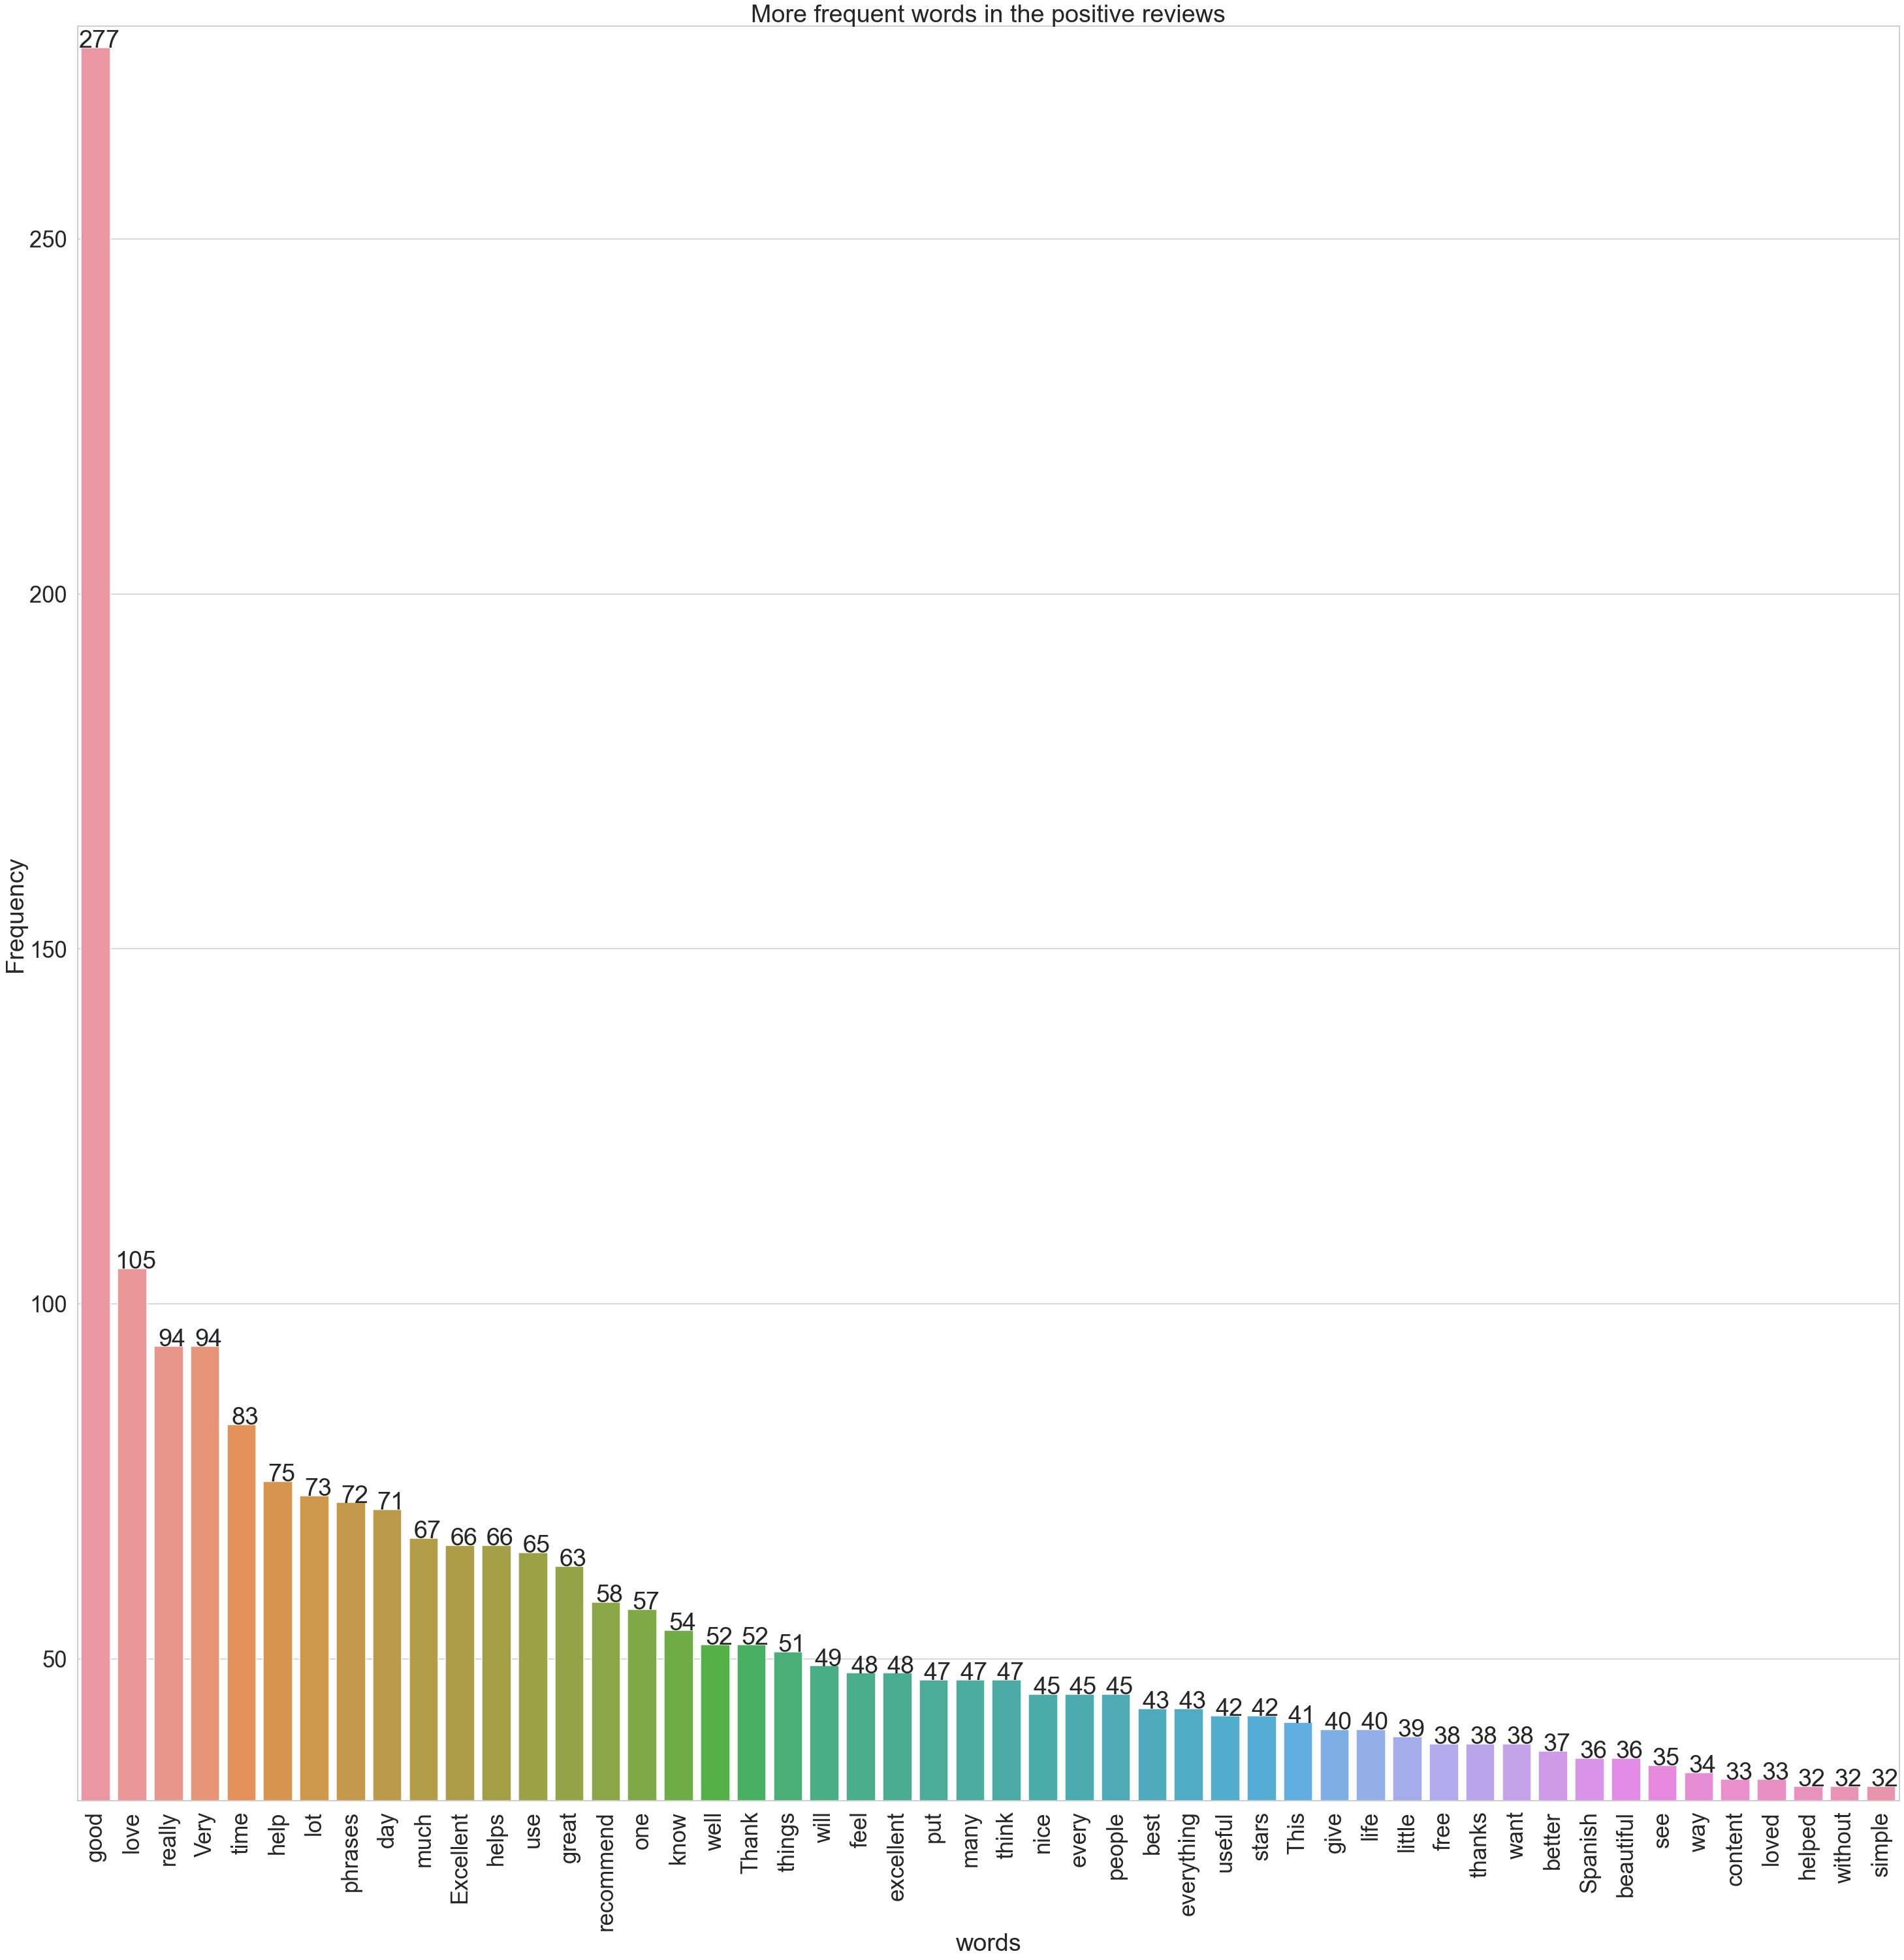

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk",font_scale=2.1)


fig, ax = plt.subplots(figsize=(50,50))

ax = sns.barplot(x="words", y="Frequency", data=top_words_pos)
ax.set(ylim=(30, 280))#select the limitds for the y axis

for p in ax.patches:
    frec = '{:.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.3
    y=p.get_y()+height
    ax.annotate(frec,(x,y),ha='center')

plt.xticks(rotation=90)  
plt.title("More frequent words in the positive reviews")
plt.show()

In [ ]:
#for the negative reviews

In [208]:
df_neg

,App,Developer,Type,Rates,Downloads+,Last_reviews,Last_reviews_eng,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,Sentiment,text_length
4,Mindfulness Meditación guiada,Metta Apps,Estilo de vida,4.1,100000,El contenido de la app es excepcional y muy út...,The content of the app is exceptional and very...,0.098,0.840,0.063,-0.3259,Negative,417
6,Desarrollo Personal,PachaStudio,Estilo de vida,2.8,1000,no carga para nada k fea app,it does not load at all k ugly app,0.292,0.708,0.000,-0.5106,Negative,34
13,Superación Personal - Librería,Libro Movil,Libros y obras de consulta,3.7,100000,pésima!!!! el audio se traba constantemente. d...,lousy !!!! the audio is constantly stuck. retu...,0.455,0.545,0.000,-0.7696,Negative,57
26,Como Ser Feliz,Wilson Castrillon,Estilo de vida,4.6,100000,Sin comentarios: tremenda aplicación,No comment: tremendous application,0.423,0.577,0.000,-0.2960,Negative,34
27,Libros de Motivación Personal Gratis📚Superación💪,Grupo StarkApp,Libros y obras de consulta,4.6,5000,"Contiene muchos libros interesantes, pero No f...","It contains many interesting books, but It doe...",0.087,0.879,0.034,-0.4451,Negative,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Self-help Anxiety Management,University of the West England,Salud y bienestar,3.9,500000,No me sirvió de nada. Está en Inglés,It did me no good. It is in English,0.231,0.769,0.000,-0.3412,Negative,35
876,Talkspace Counseling & Therapy,Talkspace,Salud y bienestar,2.9,100000,U have to pay😡,U have to pay😡,0.219,0.781,0.000,-0.1027,Negative,14
880,Test de Depresión,MoodTools,Medicina,3.8,100000,Gracias a esta app me di cuenta que tengo depr...,Thanks to this app I realized that I have seve...,0.337,0.570,0.093,-0.6310,Negative,86
881,Therapeer: Peer Emotional Support,Therapeer,Salud y bienestar,4.7,10000,"Manipulative and opportunistic, the first thin...","Manipulative and opportunistic, the first thin...",0.151,0.715,0.134,-0.4767,Negative,273


In [209]:
negative_words=' '.join(df_neg['Last_reviews_eng'])

In [210]:
negative_words

'The content of the app is exceptional and very useful. The problem I have is that listening to the audios stops me every 2 min (when the mobile screen turns off) and I have to cut the exercise to take the phone and unlock it so that the audio continues again. I can not enjoy the exercises continuously and I do not know if it is due to a configuration on my phone or if it is the app. Any advice to fix it? Thank you it does not load at all k ugly app lousy !!!! the audio is constantly stuck. return my money No comment: tremendous application It contains many interesting books, but It does not work if you are not connected to the internet, it is not recommended for browsers with a data plan, it also needs a marker to fix the reading where you left it ... For those things it does not help me .. The content is very good and well organized, they are the best I have seen, but the audios are cut in the middle of the meditation which is the same as not listening to anything and no questions or

In [211]:
negative_words = re.split(r'\W+', negative_words)

In [250]:
newStopWords2= ['good','now','don','will','A','3','TO','They']
stopwords.update(newStopWords2)

In [251]:
filtered_words = [w for w in negative_words if not w in stopwords] 

In [252]:
filtered_words_Df=pd.DataFrame(filtered_words)

In [253]:
filtered_words_Df.rename(columns={0:'words'},inplace=True)

In [254]:
top_words_neg=filtered_words_Df.words.value_counts()

In [255]:
top_words_neg

bad           11
time           8
want           8
English        7
seems          7
              ..
parameters     1
headache       1
section        1
career         1
               1
Name: words, Length: 741, dtype: int64

In [256]:
top_words_neg=pd.DataFrame(top_words_neg)

In [257]:
top_words_neg

,words
bad,11
time,8
want,8
English,7
seems,7
...,...
parameters,1
headache,1
section,1
career,1


In [258]:
top_words_neg.rename(columns={'words':'Frequency'},inplace=True)

In [259]:
top_words_neg['words']=top_words_neg.index

In [260]:
top_words_neg

,Frequency,words
bad,11,bad
time,8,time
want,8,want
English,7,English
seems,7,seems
...,...,...
parameters,1,parameters
headache,1,headache
section,1,section
career,1,career


In [261]:
#get the 50 words more frequent
top_words_neg=top_words_neg.head(50)

In [262]:
top_words_neg

,Frequency,words
bad,11,bad
time,8,time
want,8,want
English,7,English
seems,7,seems
know,7,know
audio,6,audio
go,6,go
Spanish,6,Spanish
error,6,error


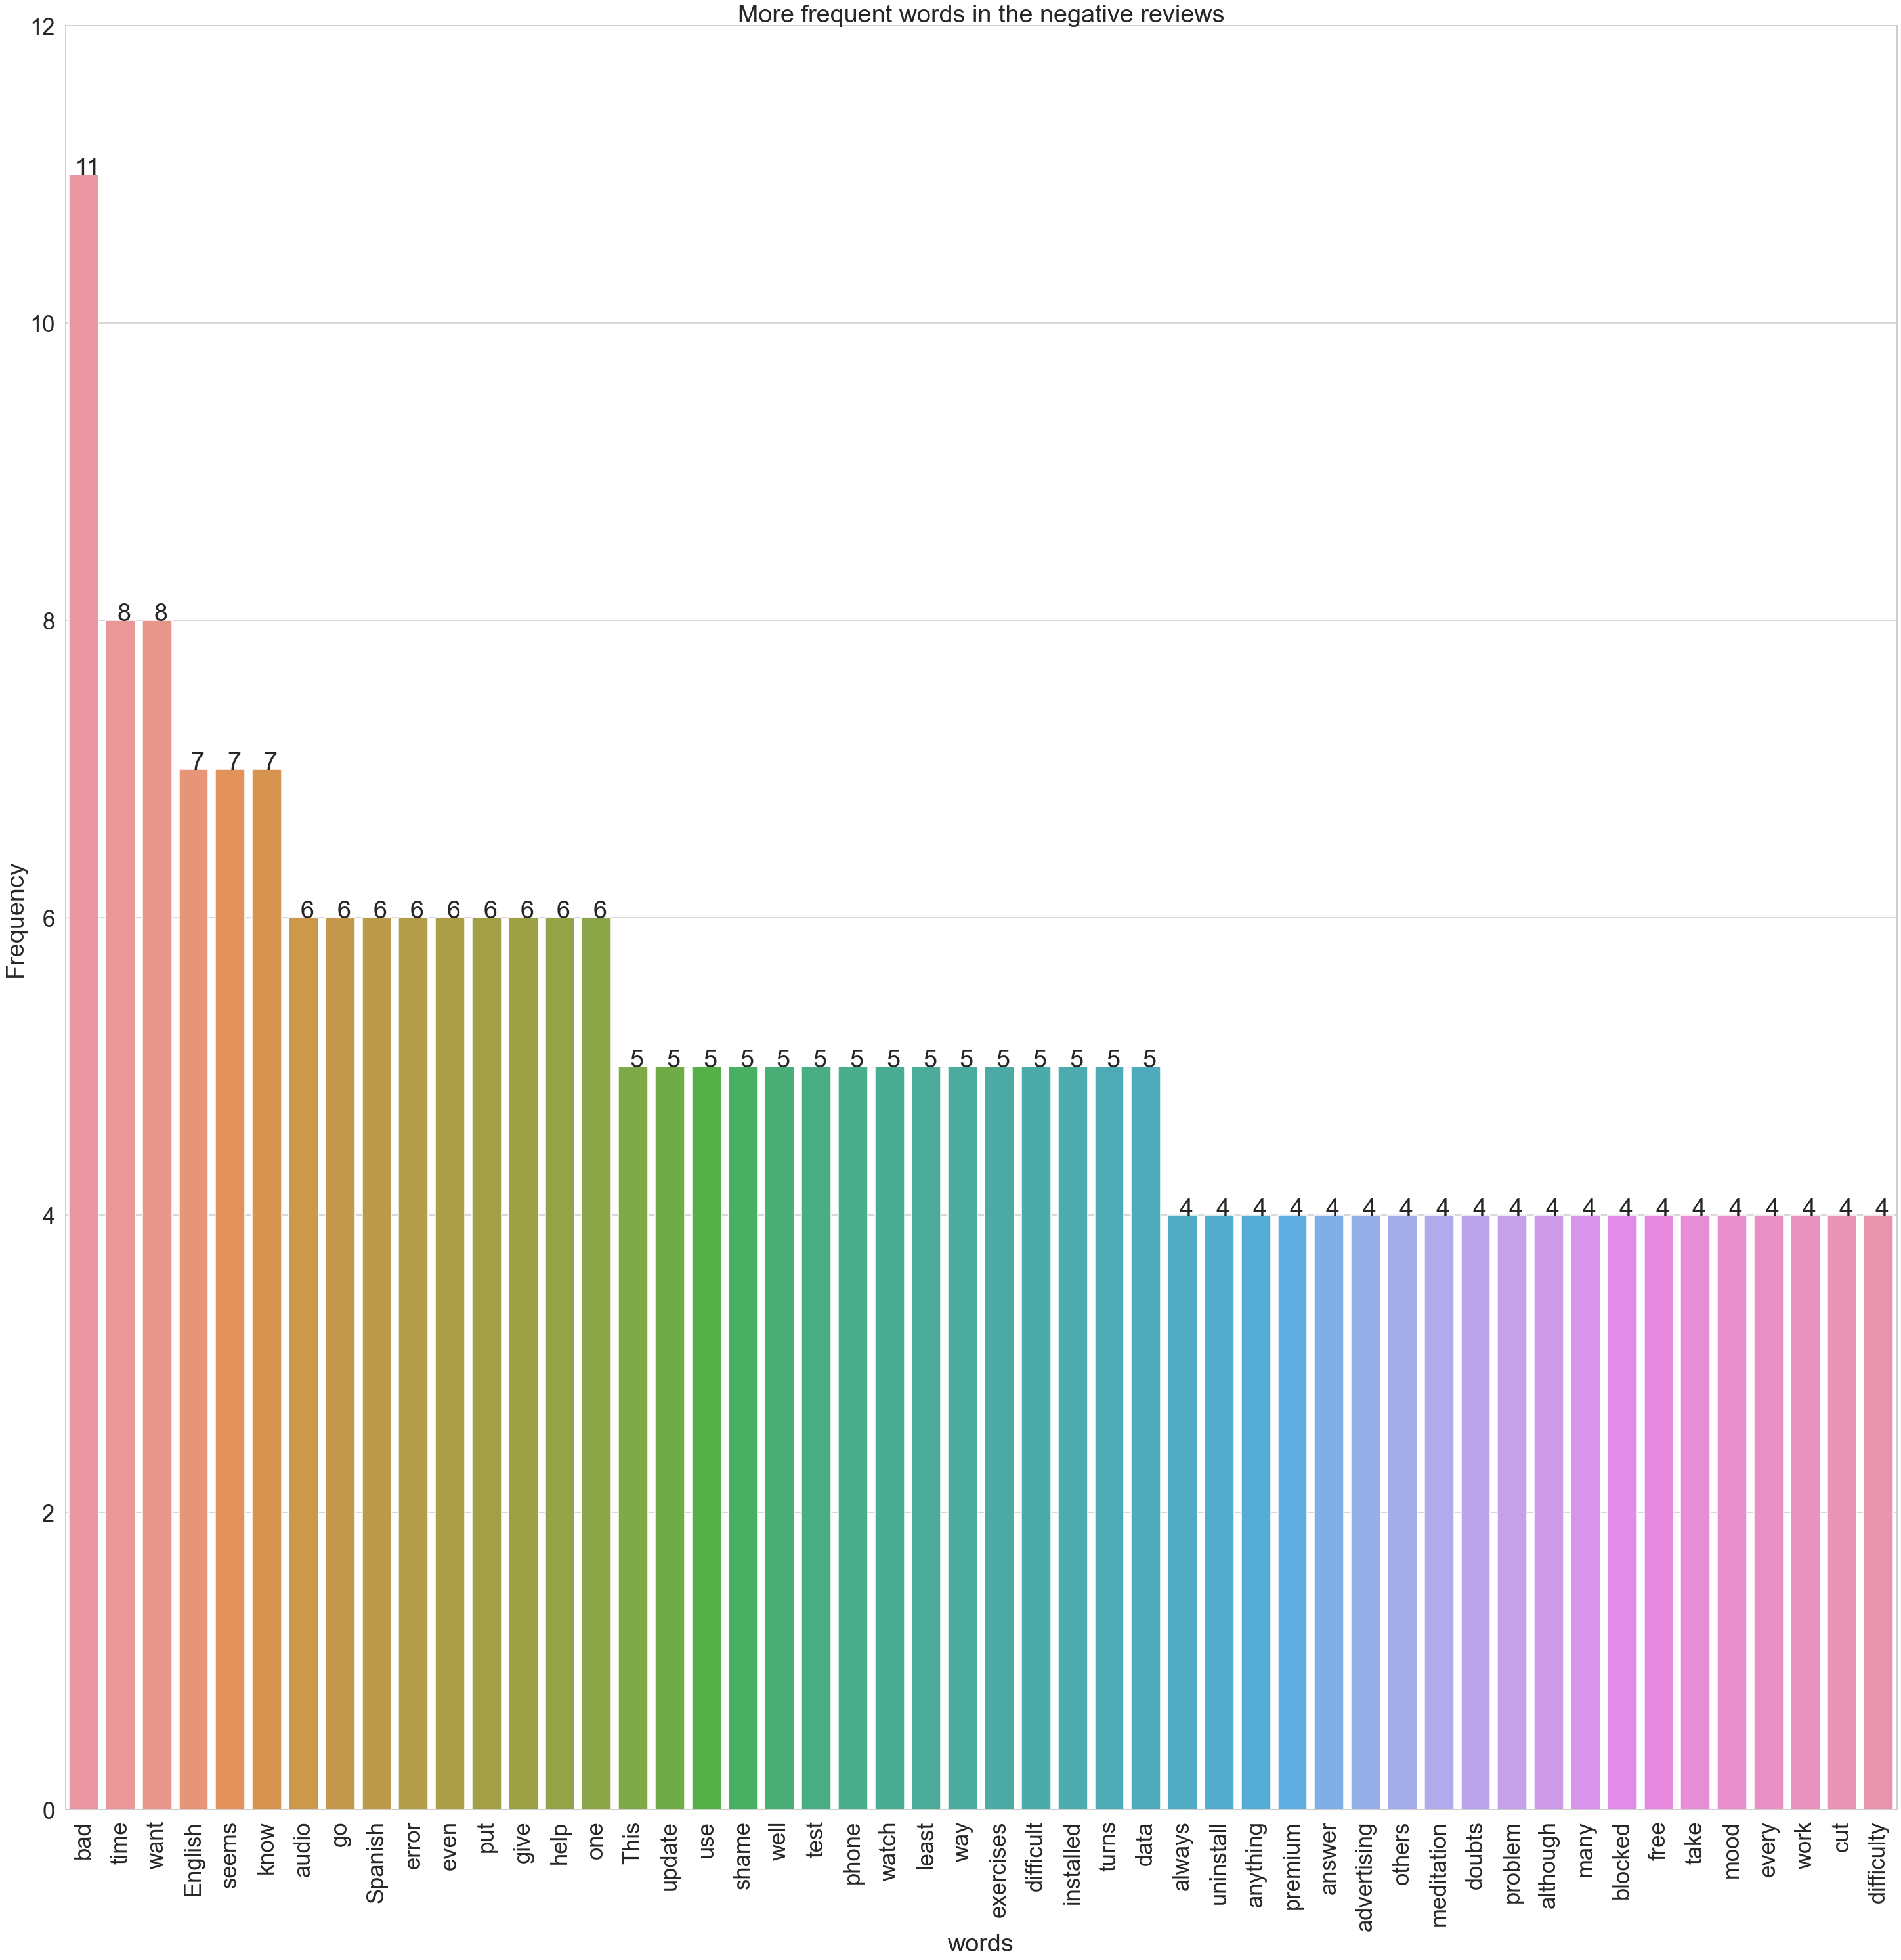

In [263]:
sns.set_context("talk",font_scale=2.1)


fig, ax = plt.subplots(figsize=(50,50))

ax = sns.barplot(x="words", y="Frequency", data=top_words_neg)
ax.set(ylim=(0, 12))#select the limitds for the y axis

for p in ax.patches:
    frec = '{:.0f}'.format(p.get_height())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width-0.3
    y=p.get_y()+height
    ax.annotate(frec,(x,y),ha='center')

plt.xticks(rotation=90)  
plt.title("More frequent words in the negative reviews")
plt.show()